In [5]:
import cv2
import numpy as np
from skimage import io, color
import matplotlib.pyplot as plt
from skimage import exposure
import pylab
import os
import math
import random
import sys



## 1.1 Disparity estimation using block matching

In [18]:
def getMSE (estimatedDisparityMap, actualDisparityMapFileName, borderPadding):

    actualDisparityMap=cv2.imread(actualDisparityMapFileName,0);

    actualDisparityPadded=cv2.copyMakeBorder(actualDisparityMap, borderPadding, borderPadding, borderPadding, borderPadding, cv2.BORDER_CONSTANT,value=0)

    mse = np.mean((actualDisparityPadded-estimatedDisparityMap)**2)
    
    return mse 


def getLeftDisparityMap	(lftViewFileName,rgtViewFileName, borderPadding):

    lftView = cv2.imread(lftViewFileName,0);

    rgtView = cv2.imread(rgtViewFileName,0);

    lftViewPadded = cv2.copyMakeBorder(lftView, borderPadding, borderPadding, borderPadding, borderPadding,cv2.BORDER_CONSTANT,value=0)

    rgtViewPadded = cv2.copyMakeBorder(rgtView, borderPadding, borderPadding, borderPadding, borderPadding,cv2.BORDER_CONSTANT,value=0)

    x,y = lftViewPadded.shape

    v,w = rgtViewPadded.shape

    lftDisparityMap = np.zeros((x,y))

    rgtDisparityMap = np.zeros((v,w))
    
    for i in range(borderPadding,x-borderPadding):
    
        for j in range(borderPadding,y-borderPadding):
        
            lftViewBlock = lftViewPadded[i-borderPadding:i+borderPadding+1,j-borderPadding:j+borderPadding+1]
        
            minSSD = sys.maxint
       
            minSSDNdx = -1
        
            for k in range(j-75,j):
        
                if(k <= borderPadding+1):
                
                    k = borderPadding+1
            
                rgtViewBlock = rgtViewPadded[i-borderPadding:i+borderPadding+1,k-borderPadding:k+borderPadding+1]
        
                viewDiff = np.square(lftViewBlock-rgtViewBlock) #left image
            
                ssd = np.sum(viewDiff)
            
                #print ssd
                if (ssd < minSSD):
            
                    minSSD = ssd
                
                    minSSDNdx = k
            
            lftDisparityMap[i][j] = j - minSSDNdx;

    return lftDisparityMap

def getRightDisparityMap(rgtViewFileName,lftViewFileName, borderPadding):

    lftView = cv2.imread(lftViewFileName,0);

    rgtView = cv2.imread(rgtViewFileName,0);

    lftViewPadded = cv2.copyMakeBorder(lftView, borderPadding, borderPadding, borderPadding, borderPadding,cv2.BORDER_CONSTANT,value=0)

    rgtViewPadded = cv2.copyMakeBorder(rgtView, borderPadding, borderPadding, borderPadding, borderPadding,cv2.BORDER_CONSTANT,value=0)

    x,y = lftViewPadded.shape

    v,w = rgtViewPadded.shape

    rgtDisparityMap = np.zeros((v,w))
    
    for i in range(borderPadding,x-borderPadding):
    
        for j in range(borderPadding,y-borderPadding):
        
            rgtViewBlock = rgtViewPadded[i-borderPadding:i+borderPadding+1,j-borderPadding:j+borderPadding+1]
        
            minSSD = sys.maxint
       
            minSSDNdx = -1
        
            for k in range(j+75,j,-1):
        
                if(k >= y - (borderPadding+1) ):
                
                    k = y - (borderPadding+2)
            
                lftViewBlock = lftViewPadded[i-borderPadding:i+borderPadding+1,k-borderPadding:k+borderPadding+1]
        
                viewDiff = np.square(rgtViewBlock-lftViewBlock)
            
                ssd = np.sum(viewDiff)
            
                #print ssd
                if (ssd < minSSD):
            
                    minSSD = ssd
                
                    minSSDNdx = k
            
            rgtDisparityMap[i][j] = minSSDNdx -j ;

    return rgtDisparityMap




MSE with respect to Left Image when the block is 9X9: 292.4737977285748
MSE with respect to Left Image when the block is 3X3: 377.295612209504


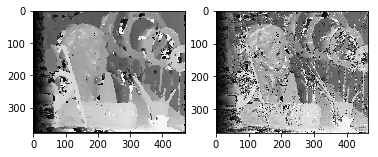

In [22]:
#For 9x9 block left image 
borderPadding = 4

lftDisparityMap9x9 = getLeftDisparityMap ('view1.png', 'view5.png', borderPadding)
     
lftDisparityMap9x9 = lftDisparityMap9x9.astype(int)

mseLeft9x9 = getMSE (lftDisparityMap9x9, 'disp1.png', borderPadding)

#For 3x3 block left image 
borderPadding = 1

lftDisparityMap3x3 = getLeftDisparityMap ('view1.png', 'view5.png', borderPadding)
     
lftDisparityMap3x3 = lftDisparityMap3x3.astype(int)

mseLeft3x3 = getMSE (lftDisparityMap3x3, 'disp1.png', borderPadding)

#print the disparity maps and the MSEs
print "MSE with respect to Left Image when the block is 9X9:",mseLeft9x9
print "MSE with respect to Left Image when the block is 3X3:",mseLeft3x3
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(lftDisparityMap9x9, cmap=plt.cm.gray)
ax2.imshow(lftDisparityMap3x3, cmap=plt.cm.gray)

MSE with respect to Right Image when the block is 9X9: 175.16845280221077
MSE with respect to Right Image when the block is 3X3: 258.2366227309516


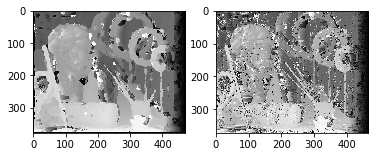

In [21]:
#For 9x9 block left image 
borderPadding = 4

rgtDisparityMap9x9 = getRightDisparityMap ( 'view5.png', 'view1.png', borderPadding)
     
rgtDisparityMap9x9 = rgtDisparityMap9x9.astype(int)

mseRight9x9 = getMSE (rgtDisparityMap9x9, 'disp5.png', borderPadding)

#For 3x3 block left image 
borderPadding = 1

rgtDisparityMap3x3 = getRightDisparityMap ('view5.png', 'view1.png', borderPadding)
     
rgtDisparityMap3x3 = rgtDisparityMap3x3.astype(int)

mseRight3x3 = getMSE (rgtDisparityMap3x3, 'disp5.png', borderPadding)

#print the disparity maps and the MSEs
print "MSE with respect to Right Image when the block is 9X9:",mseRight9x9
print "MSE with respect to Right Image when the block is 3X3:",mseRight3x3
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(rgtDisparityMap9x9, cmap=plt.cm.gray)
ax2.imshow(rgtDisparityMap3x3, cmap=plt.cm.gray)

## 1.2 Consistencycheck

In [19]:
def getLeftConsistency (lftDisparityMap, rgtDisparityMap, padding):
    x,y = lftDisparityMap.shape
    leftConsistency = np.zeros((x,y))
    for i in range (padding,x-padding):
        for j in range (padding, y-padding):
            lftDisparityValAtCurrPxl=lftDisparityMap[i][j]
            if j-lftDisparityValAtCurrPxl > 0:
                rgtDisparityValAtEstCurrPxl = rgtDisparityMap[i] [j-lftDisparityValAtCurrPxl]
            else:
                rgtDisparityValAtEstCurrPxl = rgtDisparityMap[i][j]
            
            if(lftDisparityValAtCurrPxl == rgtDisparityValAtEstCurrPxl):
                leftConsistency[i][j]= lftDisparityValAtCurrPxl
            else:
                leftConsistency[i][j] = 0
    return leftConsistency

def getRightConsistency (rgtDisparityMap, lftDisparityMap, padding):
    x,y = rgtDisparityMap.shape
    rightConsistency = np.zeros((x,y))
    for i in range (padding,x-padding):
        for j in range (padding, y-padding):
            rgtDisparityValAtEstCurrPxl=rgtDisparityMap[i][j]
            if ((j+rgtDisparityValAtEstCurrPxl) < (y-padding) ):
                lftDisparityValAtCurrPxl = lftDisparityMap[i] [j+rgtDisparityValAtEstCurrPxl]
            else:
                lftDisparityValAtCurrPxl = lftDisparityMap[i][j]
            
            if(rgtDisparityValAtEstCurrPxl == lftDisparityValAtCurrPxl):
                rightConsistency[i][j] = rgtDisparityValAtEstCurrPxl
            else:
                rightConsistency[i][j] = 0
    return rightConsistency

MSE with respect to Left Image when the block is 9X9 after consistency check: 936.7398083555196
MSE with respect to Left Image when the block is 3X3 after consistency check: 1248.070470574633


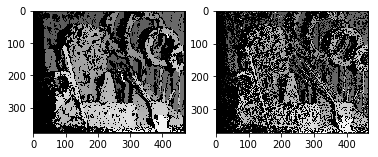

In [113]:
#For 9x9 block left image 
borderPadding = 4

lftDisparityMap9x9AfterConsistencyCheck = getLeftConsistency (lftDisparityMap9x9, rgtDisparityMap9x9, borderPadding)

mseLeft9x9AfterConsistencyCheck = getMSE (lftDisparityMap9x9AfterConsistencyCheck, 'disp1.png', borderPadding)


#For 3x3 block left image 
borderPadding = 1

lftDisparityMap3x3AfterConsistencyCheck = getLeftConsistency (lftDisparityMap3x3, rgtDisparityMap3x3, borderPadding)

mseLeft3x3AfterConsistencyCheck = getMSE (lftDisparityMap3x3AfterConsistencyCheck, 'disp1.png', borderPadding)


#print the disparity maps and the MSEs
print "MSE with respect to Left Image when the block is 9X9 after consistency check:",mseLeft9x9AfterConsistencyCheck
print "MSE with respect to Left Image when the block is 3X3 after consistency check:",mseLeft3x3AfterConsistencyCheck
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(lftDisparityMap9x9AfterConsistencyCheck, cmap=plt.cm.gray)
ax2.imshow(lftDisparityMap3x3AfterConsistencyCheck, cmap=plt.cm.gray)

In [20]:
#For 9x9 block left image 
borderPadding = 4

rgtDisparityMap9x9AfterConsistencyCheck = getRightConsistency (rgtDisparityMap9x9, lftDisparityMap9x9, borderPadding)

mseRight9x9AfterConsistencyCheck = getMSE (rgtDisparityMap9x9AfterConsistencyCheck, 'disp5.png', borderPadding)


#For 3x3 block left image 
borderPadding = 1

rgtDisparityMap3x3AfterConsistencyCheck = getRightConsistency (rgtDisparityMap3x3, lftDisparityMap3x3, borderPadding)

mseRight3x3AfterConsistencyCheck = getMSE (rgtDisparityMap3x3AfterConsistencyCheck, 'disp5.png', borderPadding)


#print the disparity maps and the MSEs
print "MSE with respect to Right Image when the block is 9X9 after consistency check:",mseRight9x9AfterConsistencyCheck
print "MSE with respect to Right Image when the block is 3X3 after consistency check:",mseRight3x3AfterConsistencyCheck
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(rgtDisparityMap9x9AfterConsistencyCheck, cmap=plt.cm.gray)
ax2.imshow(rgtDisparityMap3x3AfterConsistencyCheck, cmap=plt.cm.gray)

NameError: name 'rgtDisparityMap9x9' is not defined

## 1.3 Disparity estimation using Dynamic Programming

C:\Users\amol\AppData\Local\Continuum\Anaconda3\envs\cvip\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: overflow encountered in ubyte_scalars


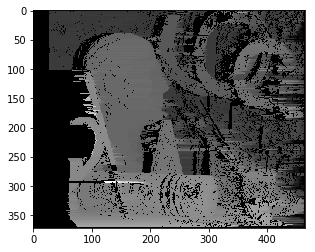

In [82]:
lft = cv2.imread('view1.png', 0)  #read it as a grayscale image
rgt = cv2.imread('view5.png', 0)

#OcclusionCost = 20 (You can adjust this, depending on how much threshold you want to give for noise)
oc=20

displft=np.zeros((372,465))
disprgt=np.zeros((372,465))

# Use the pseudocode from "A Maximum likelihood Stereo Algorithm" paper given as reference
for c in range (0,370):
    #print c
    cm=np.zeros((463,463))
    dm=np.zeros((463,463))
    for i in range(0,463):
        cm[i,0] = i*oc
        cm[0,i] = i*oc
    for a in range (0,463):
        for b in range(0,463):
            match_cost=np.absolute(lft[c,a]-rgt[c,b])
           # if (match_cost>=oc):
            #   min1=9999
           # else:
            min1=cm[a-1,b-1]+match_cost
            min2=cm[a-1,b]+oc
            min3=cm[a,b-1]+oc
            cm[a,b]=cmin=min(min1,min2,min3)
            if(min1==cmin):
                dm[a,b]=1;
            if(min2==cmin):
                dm[a,b]=2;
            if(min3==cmin):
                dm[a,b]=3;
           
    p=462
    q=462
    while (p!=0) and  (q!=0):
        if(dm[p,q]==1):
            displft[c,p]=np.absolute(p-q)
            disprgt[c,q]=np.absolute(p-q)
            p=p-1
            q=q-1
        elif(dm[p,q]==2):
            displft[c,p]=0
            displft[c,q]=0
            p=p-1
        elif(dm[p,q]==3):
            displft[c,p]=0
            displft[c,q]=0
            q=q-1

          
plt.imshow(displft, cmap=plt.cm.gray)

            


## 1.4 View Synthesis

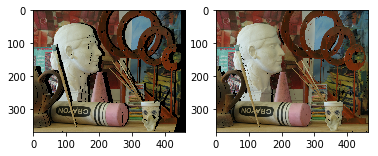

In [12]:
import copy

leftView = cv2.imread('view1.png');
rightView = cv2.imread('view5.png');
disparityLeft=cv2.imread('disp1.png',0);
disparityRight=cv2.imread('disp5.png',0);

x,y,z= leftView.shape

viewSynthesis=np.zeros((x,y,z),np.uint8)
#filled = np.zeros((x,y), np.uint8)
count = 0

for i in range (0,x):
    for j in range (0,y):
        distanceLeft=disparityLeft[i,j]
        midPointInCentralImage=distanceLeft/2
        #if (j-mid_index>=0)and(j-mid_index<=y):
        if j-midPointInCentralImage < 0:
            # print 'empty'
            # count += 1
            continue
        viewSynthesis[i,j-midPointInCentralImage]=leftView[i,j]
        #filled[i,j-mid_index] = 1

viewSynthesisLftOnly = copy.deepcopy(viewSynthesis)        

for n in range (0,x):
    for m in range (0,y):
        distanceRight=disparityRight[n,m]
        mid=distanceRight/2
        #print distanceRight
        if m+mid>=y:
            continue
        #if (j+mid>=0)and(j+mid<=y):
    
        if viewSynthesis[n,m+mid].any() == 0:
                # print 'filling',view_synthesis[n][m+mid]
                #count -= 1
                viewSynthesis[n,m+mid]=rightView[n,m]
                
#print view_synthesis
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(viewSynthesisLftOnly[...,::-1])#convert bgr to rgb
ax2.imshow(viewSynthesis[...,::-1])
               
        

## 2 Image Segmentation

25063
Creating a Cluster, #of Unclustered Points: 166500 starting Centroid: [17. 66. 38. 50. 63. -1.]
Created Cluster#: 0 with 16620 Pixels and a Centroid of[17. 66. 38. 50. 63.  0.]
35978
Creating a Cluster, #of Unclustered Points: 149880 starting Centroid: [157. 117. 182.  98. 385.  -1.]
Created Cluster#: 1 with 3016 Pixels and a Centroid of[157. 117. 182.  98. 385.   1.]
95023
Creating a Cluster, #of Unclustered Points: 146864 starting Centroid: [ 59. 137. 214. 229. 159.  -1.]
Created Cluster#: 2 with 8409 Pixels and a Centroid of[ 36.46003746 152.45582267 223.40555729 200.20028099 178.24133625]
73285
Creating a Cluster, #of Unclustered Points: 138455 starting Centroid: [ 41. 159. 224. 194. 367.  -1.]
Created Cluster#: 3 with 8380 Pixels and a Centroid of[ 37.99351545 146.93251996 222.47285988 202.9991622  333.11293566]
28801
Creating a Cluster, #of Unclustered Points: 130075 starting Centroid: [  0.   5.   4.  82. 204.  -1.]
Created Cluster#: 4 with 18555 Pixels and a Centroid of[ 

Created Cluster#: 38 with 997 Pixels and a Centroid of[ 88.89544688 134.30016863 131.51096121  22.58178752  43.79426644]
356
Creating a Cluster, #of Unclustered Points: 3768 starting Centroid: [ 24.  70.  81.  22. 496.  -1.]
Created Cluster#: 39 with 132 Pixels and a Centroid of[ 15.75963127  23.30304511  18.74962582  56.90416863 447.45032127]
3085
Creating a Cluster, #of Unclustered Points: 3636 starting Centroid: [ 12.  64.  34. 284.   1.  -1.]
Created Cluster#: 40 with 375 Pixels and a Centroid of[ 39.46304373  61.61188539  52.34990921 278.89951666  27.45357415]
2808
Creating a Cluster, #of Unclustered Points: 3261 starting Centroid: [134. 140. 145. 266. 152.  -1.]
Created Cluster#: 41 with 15 Pixels and a Centroid of[158.95695877 174.44567973 162.99955198 263.29277778  63.86944444]
572
Creating a Cluster, #of Unclustered Points: 3246 starting Centroid: [ 65. 122.  77.  77. 151.  -1.]
Created Cluster#: 42 with 102 Pixels and a Centroid of[ 16.78825625  55.1163776   34.39286861  61.0

Created Cluster#: 79 with 35 Pixels and a Centroid of[ 47.49909385 100.40838718  83.30003092 163.92084433 448.05314738]
238
Creating a Cluster, #of Unclustered Points: 592 starting Centroid: [249. 248. 255. 116. 253.  -1.]
Created Cluster#: 80 with 1 Pixels and a Centroid of[177.06610242 221.70007409 237.53359123 214.92075472 237.53396226]
183
Creating a Cluster, #of Unclustered Points: 591 starting Centroid: [ 86.  45. 137. 106. 388.  -1.]
Pixel assigned to its own cluster after Mean Shift#: 81
429
Creating a Cluster, #of Unclustered Points: 590 starting Centroid: [145. 138. 141. 198. 129.  -1.]
Pixel assigned to its own cluster after Mean Shift#: 82
14
Creating a Cluster, #of Unclustered Points: 589 starting Centroid: [173. 165. 172.  31.   6.  -1.]
Created Cluster#: 83 with 2 Pixels and a Centroid of[ 90.90399955 135.7184741  133.10294755  33.63669951  47.7179803 ]
206
Creating a Cluster, #of Unclustered Points: 587 starting Centroid: [144. 160. 159. 111. 260.  -1.]
Created Cluster#

Created Cluster#: 125 with 3 Pixels and a Centroid of[ 91.79034052 118.60261423 116.16491089 284.55185538 405.39200761]
23
Creating a Cluster, #of Unclustered Points: 286 starting Centroid: [103.  65. 107.  58. 383.  -1.]
Pixel assigned to its own cluster after Mean Shift#: 126
262
Creating a Cluster, #of Unclustered Points: 285 starting Centroid: [132. 129. 131. 206. 118.  -1.]
Pixel assigned to its own cluster after Mean Shift#: 127
95
Creating a Cluster, #of Unclustered Points: 284 starting Centroid: [ 94.  74.  93.  83. 421.  -1.]
Pixel assigned to its own cluster after Mean Shift#: 128
168
Creating a Cluster, #of Unclustered Points: 283 starting Centroid: [234. 253. 255. 112. 271.  -1.]
Pixel assigned to its own cluster after Mean Shift#: 129
49
Creating a Cluster, #of Unclustered Points: 282 starting Centroid: [ 86.  70.  93.  69. 411.  -1.]
Created Cluster#: 130 with 26 Pixels and a Centroid of[ 25.25371336  46.62655192  38.39638593  96.56483871 400.45032258]
10
Creating a Clust

Created Cluster#: 173 with 3 Pixels and a Centroid of[225.69296021 228.74633957 220.8927161  198.8        418.64878049]
18
Creating a Cluster, #of Unclustered Points: 165 starting Centroid: [ 99.  63. 105.  64. 373.  -1.]
Pixel assigned to its own cluster after Mean Shift#: 174
23
Creating a Cluster, #of Unclustered Points: 164 starting Centroid: [222. 199. 221.  75. 387.  -1.]
Created Cluster#: 175 with 1 Pixels and a Centroid of[184.76922046 214.01355205 218.45876705 207.39381153 420.8326301 ]
80
Creating a Cluster, #of Unclustered Points: 163 starting Centroid: [250. 248. 254. 106. 270.  -1.]
Pixel assigned to its own cluster after Mean Shift#: 176
7
Creating a Cluster, #of Unclustered Points: 162 starting Centroid: [101.  52. 114.  58. 397.  -1.]
Pixel assigned to its own cluster after Mean Shift#: 177
154
Creating a Cluster, #of Unclustered Points: 161 starting Centroid: [ 13.  85. 186. 208. 405.  -1.]
Pixel assigned to its own cluster after Mean Shift#: 178
73
Creating a Cluster,

Pixel assigned to its own cluster after Mean Shift#: 222
1
Creating a Cluster, #of Unclustered Points: 90 starting Centroid: [ 91.  66. 100.  55. 398.  -1.]
Pixel assigned to its own cluster after Mean Shift#: 223
71
Creating a Cluster, #of Unclustered Points: 89 starting Centroid: [ 95.  92.  88. 152.  57.  -1.]
Pixel assigned to its own cluster after Mean Shift#: 224
12
Creating a Cluster, #of Unclustered Points: 88 starting Centroid: [ 97.  77.  96.  75. 415.  -1.]
Pixel assigned to its own cluster after Mean Shift#: 225
41
Creating a Cluster, #of Unclustered Points: 87 starting Centroid: [248. 251. 255. 115. 254.  -1.]
Pixel assigned to its own cluster after Mean Shift#: 226
42
Creating a Cluster, #of Unclustered Points: 86 starting Centroid: [ 83.  95.  89. 118.  14.  -1.]
Pixel assigned to its own cluster after Mean Shift#: 227
8
Creating a Cluster, #of Unclustered Points: 85 starting Centroid: [ 94.  56. 116.  64. 405.  -1.]
Pixel assigned to its own cluster after Mean Shift#: 2

22
Creating a Cluster, #of Unclustered Points: 34 starting Centroid: [ 76. 113.  93. 132.  19.  -1.]
Created Cluster#: 274 with 2 Pixels and a Centroid of[ 19.35742109  51.41584197  33.16199045 123.46766548  43.91764009]
3
Creating a Cluster, #of Unclustered Points: 32 starting Centroid: [ 91.  52. 108.  59. 387.  -1.]
Created Cluster#: 275 with 1 Pixels and a Centroid of[ 26.1883844   49.02207059  46.22856438  97.09979839 358.29495968]
25
Creating a Cluster, #of Unclustered Points: 31 starting Centroid: [112. 106. 117. 168.  98.  -1.]
Pixel assigned to its own cluster after Mean Shift#: 276
16
Creating a Cluster, #of Unclustered Points: 30 starting Centroid: [246. 253. 255. 121. 273.  -1.]
Pixel assigned to its own cluster after Mean Shift#: 277
28
Creating a Cluster, #of Unclustered Points: 29 starting Centroid: [ 16.  83. 182. 209. 405.  -1.]
Pixel assigned to its own cluster after Mean Shift#: 278
24
Creating a Cluster, #of Unclustered Points: 28 starting Centroid: [ 95.  73.  78. 

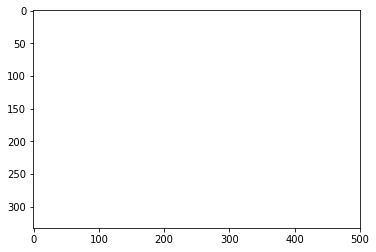

In [64]:
def getEuclidDistance(x, xi):
    dist = 0
    for j in range(5):
        dist = dist + np.sum((x[j] - xi[j])**2) 
    return np.sqrt(dist)

def getUnClusteredPoints(feature_matrix):
    return [vec for vec in feature_matrix if vec[5] < 0]
     
def getRandomCentroid(unClustered):
    index = random.randint(0,len(unClustered)-1)
    print index
    return unClustered[index]

def getNeighborhood(feature_matrix,centroid,neighborhoodDistThreshold):
    neighborhood=[]
    eucli_dist=0
    for i in range(0,len(feature_matrix)):
        eucli_dist = getEuclidDistance(centroid,feature_matrix[i])
        if eucli_dist < neighborhoodDistThreshold:
            neighborhood.append(feature_matrix[i])
    return neighborhood

def performMeanShift(neighborhood):
    newCentroid = np.zeros(5)
    neighbors = len(neighborhood)
    for i in range(0,neighbors):
        newCentroid[0] = newCentroid[0] + neighborhood[i][0]
        newCentroid[1] = newCentroid[1] + neighborhood[i][1]
        newCentroid[2] = newCentroid[2] + neighborhood[i][2]
        newCentroid[3] = newCentroid[3] + neighborhood[i][3]
        newCentroid[4] = newCentroid[4] + neighborhood[i][4]
    return np.true_divide(newCentroid, neighbors)

def createClusterAndUpdateRGBValues (neighborhood , centroid, clusterNdx):
    neighbors = len(neighborhood)
    noOfPtsClustered = 0
    for i in range(0,neighbors):
        if(neighborhood[i][5] < 0):
            neighborhood[i][0] = centroid[0]
            neighborhood[i][1] = centroid[1]
            neighborhood[i][2] = centroid[2]
            neighborhood[i][5] = clusterNdx
            noOfPtsClustered = noOfPtsClustered + 1
    return noOfPtsClustered

def assignPixelToCurrentNeighborhood(neighborhood,currentUnClusteredPxl):
    neighbors = len(neighborhood)
    existingClusterHashMap = {}
    clusteredNeigborCnt = 0
    clusterNdxWithMaxPxls = -1
    for i in range(0,neighbors):
        if(neighborhood[i][5] >= 0):
            clusteredNeigborCnt += 1
            if neighborhood[i][5] in existingClusterHashMap:
                existingClusterHashMap[neighborhood[i][5]] += 1
            else:
                existingClusterHashMap[neighborhood[i][5]] = 1
                if(clusterNdxWithMaxPxls < 0):
                    clusterNdxWithMaxPxls = neighborhood[i][5]
            
            if (existingClusterHashMap[neighborhood[i][5]] > existingClusterHashMap[clusterNdxWithMaxPxls]):
                clusterNdxWithMaxPxls = neighborhood[i][5]
                clusterVals = neighborhood[i]
                
    if( clusteredNeigborCnt > (0.8 * neighbors) ):
        currentUnClusteredPxl[0] = clusterVals [0]
        currentUnClusteredPxl[1] = clusterVals [1]
        currentUnClusteredPxl[2] = clusterVals [2]
        currentUnClusteredPxl[5] = clusterNdxWithMaxPxls
    
    return clusterNdxWithMaxPxls

def createSinglePixelCluster(neighborhood,currentUnClusteredPxl):
    neighbors = len(neighborhood)
    clusteredNeigborCnt = 0
    returnval = 0
    for i in range(0,neighbors):
        if(neighborhood[i][5] >= 0):
            clusteredNeigborCnt += 1
    if(clusteredNeigborCnt == (neighbors-1)):
        returnval = 1

    return returnval    
        
Image = cv2.imread('Butterfly.jpg')
x,y,color_value=Image.shape


#Create the feature matrix of the image by creating a 5 dimensional feature vector by reading RGB and X,Y values
feature_matrix=np.zeros((x*y,6)) #initialize the feature matrix
m=0
for i in range(0,x):
    for j in range(0,y):
        #store the color values of the current pixel
        feature_matrix[m][0] = Image[i][j][0] 
        feature_matrix[m][1] = Image[i][j][1]
        feature_matrix[m][2] = Image[i][j][2]
        #store the location of the current pixel
        feature_matrix[m][3] = i
        feature_matrix[m][4] = j
        #flag whether this vec/point belong to a cluster
        feature_matrix[m][5] = -1
        m=m+1
        
neighborhoodDistThreshold=100

meanShiftThreshold=30

clusterCentroids = []
while(len(getUnClusteredPoints(feature_matrix))>0):
    #genrate a random centroid
    centroid = getRandomCentroid(getUnClusteredPoints(feature_matrix))
    currentUnClusteredPxl = centroid #may need to save this later
    print "Creating a Cluster, #of Unclustered Points: " +  str(len(getUnClusteredPoints(feature_matrix))) + " starting Centroid: " + str (centroid)
    neighborhood = getNeighborhood(feature_matrix,centroid,neighborhoodDistThreshold)
    #check if the current pixel can be assigned to a current cluster based on the neighborhood
    createASinglePixelCluster = createSinglePixelCluster(neighborhood,currentUnClusteredPxl)
    if(createASinglePixelCluster > 0):
        currentUnClusteredPxl[5] = len(clusterCentroids) 
        clusterCentroids.append(currentUnClusteredPxl)
        print "Pixel assigned to its own cluster#: " + str(len(clusterCentroids))
    else:    
        continueMeanShift = 1
        while (continueMeanShift > 0):
            if(len(neighborhood)>0):
                newCentroid = performMeanShift(neighborhood)         
                if(getEuclidDistance(centroid,newCentroid) > meanShiftThreshold):  #repeat the process
                    centroid = newCentroid
                    neighborhood = getNeighborhood(feature_matrix,centroid,neighborhoodDistThreshold)
                else: #achieved stability
                    continueMeanShift = 0
                    noOfPxlsInCluster = createClusterAndUpdateRGBValues (neighborhood , centroid, len(clusterCentroids) ) 
                    if(noOfPxlsInCluster == 0):
                        print "Pixel assigned to its own cluster after Mean Shift#: " + str(len(clusterCentroids))
                        currentUnClusteredPxl[5] = len(clusterCentroids) 
                        clusterCentroids.append(currentUnClusteredPxl)
                    else:    
                        print "Created Cluster#: " +    str(len(clusterCentroids))  + " with "+  str(noOfPxlsInCluster) +" Pixels and a Centroid of"+  str(centroid)
                        clusterCentroids.append(centroid)
            else:
                continueMeanShift = 0
print "done"
print clusterCentroids

#created the segmented image
segmentedImage=np.zeros(Image.shape, dtype=np.float32)
x,y,color_value=segmentedImage.shape
m=0
for i in range(0,x):
    for j in range(0,y):
        #store the color values of the current pixel
        segmentedImage[i][j][0] = feature_matrix[m][2]
        segmentedImage[i][j][1] = feature_matrix[m][1]
        segmentedImage[i][j][2] = feature_matrix[m][0]
        m=m+1
        
segmentedImage = segmentedImage.astype(int)
plt.imshow(segmentedImage)
        
    

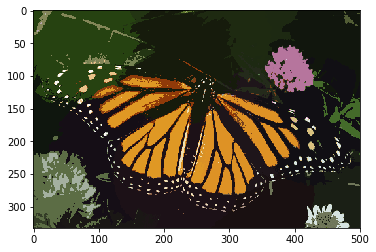

In [81]:
plt.imshow(segmentedImage)